In [1]:
import zipfile
import os
import shutil

In [ ]:
# === Upload your dataset ===
from google.colab import files
uploaded = files.upload()

Saving yolo dataset.zip to yolo dataset.zip


In [3]:
import zipfile
import os

zip_path = "yolo_final.zip"  # match your filename
extract_dir = "/content/GPR-YOLO-Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [4]:
import os

base_path = "/content/GPR-YOLO-Dataset/yolo_final"

# Rename folders to lowercase as expected by YOLOv5
os.rename(f"{base_path}/image50", f"{base_path}/images")
os.rename(f"{base_path}/label50", f"{base_path}/labels")
os.rename(f"{base_path}/images/train", f"{base_path}/images/training")
os.rename(f"{base_path}/images/val", f"{base_path}/images/validation")
os.rename(f"{base_path}/labels/train", f"{base_path}/labels/training")
os.rename(f"{base_path}/labels/val", f"{base_path}/labels/validation")

In [5]:
!ls -R /content/GPR-YOLO-Dataset/yolo_final/

Streaming output truncated to the last 5000 lines.
image_032_png.rf.eeeda3a7eccce9160e2717fc621993fe.jpg
image_032_png.rf.efac3138880f78df54b0fc7e493793da.jpg
image_032_png.rf.f99085b32d3f05c95ad58e23a710dded.jpg
image_033_png.rf.009956400b2c323c63f671174413adcf.jpg
image_033_png.rf.099efdcbce803da26e73410660b07742.jpg
image_033_png.rf.10be79e363a1995b107d3ece867f12c9.jpg
image_033_png.rf.165b2a13811986c9090c53aad25cc234.jpg
image_033_png.rf.1ebb73497c3b2472b3cecf67084c502b.jpg
image_033_png.rf.1fbae54ff942e6df5bbee05fab697abb.jpg
image_033_png.rf.214f1a5f59827eb01bafbd3de763de2e.jpg
image_033_png.rf.27d46fc295aab4d6d8fff2453353ab32.jpg
image_033_png.rf.401afab6a2b13b61d930b65978bb5a15.jpg
image_033_png.rf.4123f15474d4c037930c461f6248261e.jpg
image_033_png.rf.4989e39a8dbb134cd0fc626e80481ada.jpg
image_033_png.rf.4e795c09b3b7d6b9c12db13635339334.jpg
image_033_png.rf.4fb26bb8a8e48c546b50c0fe40a45ea7.jpg
image_033_png.rf.50554b1403e13dbc516379b1ff5f2b6a.jpg
image_033_png.rf.545bdb43abd915

In [6]:
yaml_path = f"{extract_dir}/yolo_final/gpr_data.yaml"

with open(yaml_path, 'w') as f:
    f.write(f"""
path: {extract_dir}/yolo_final
train: images/training
val: images/validation
test: images/test
nc: 1
names: ['hyperbola']
""")


In [7]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17564, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 17564 (delta 33), reused 7 (delta 7), pack-reused 17510 (from 4)
Receiving objects: 100% (17564/17564), 16.69 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (12031/12031), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.4 MB/s eta 0:00:00


In [8]:
import os
os.environ["WANDB_MODE"] = "disabled"

!python train.py \
  --img 256 \
  --batch 8 \
  --epochs 60 \
  --data /content/GPR-YOLO-Dataset/yolo_final/gpr_data.yaml \
  --weights yolov5s.pt \
  --project runs/train_gpr \
  --name yolov5s_gpr \
  --save-period 10 \
  --exist-ok


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      53/59       0.7G     0.0419    0.01542          0         23        256:  84% 336/402 [00:21<00:04, 15.13it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      53/59       0.7G     0.0419    0.01541          0         39        256:  84% 338/402 [00:22<00:04, 15.50it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      53/59       0.7G    0.04189    0.01541          0         36        256:  84% 338/402 [00:22<00:04, 15.50it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [9]:
!ls runs/train_gpr/yolov5s_gpr/weights/


best.pt    epoch10.pt  epoch30.pt  epoch50.pt
epoch0.pt  epoch20.pt  epoch40.pt  last.pt


In [10]:
!python detect.py \
  --weights runs/train_gpr/yolov5s_gpr/weights/best.pt \
  --img 256 \
  --conf 0.3 \
  --source /content/GPR-YOLO-Dataset/yolo_final/images/validation \
  --name yolov5_infer \
  --save-txt \
  --exist-ok


detect: weights=['runs/train_gpr/yolov5s_gpr/weights/best.pt'], source=/content/GPR-YOLO-Dataset/yolo_final/images/validation, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov5_infer, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/351 /content/GPR-YOLO-Dataset/yolo_final/images/validation/1001_4.png: 256x256 2 hyperbolas, 6.4ms
image 2/351 /content/GPR-YOLO-Dataset/yolo_final/images/validation/1003_2.png: 256x256 2 hyperbolas, 6.5ms
image 3/351 /content/GPR-YOLO-Data

In [ ]:
!ls -R runs/train_gpr

runs/train_gpr:
yolov5s_gpr

runs/train_gpr/yolov5s_gpr:
confusion_matrix.png				    results.png
events.out.tfevents.1756328533.7f026ad30bd9.3588.0  train_batch0.jpg
events.out.tfevents.1756328637.7f026ad30bd9.4104.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
hyp.yaml					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
opt.yaml					    val_batch1_pred.jpg
P_curve.png					    val_batch2_labels.jpg
PR_curve.png					    val_batch2_pred.jpg
R_curve.png					    weights
results.csv

runs/train_gpr/yolov5s_gpr/weights:
best.pt  epoch0.pt  epoch10.pt	epoch20.pt  last.pt


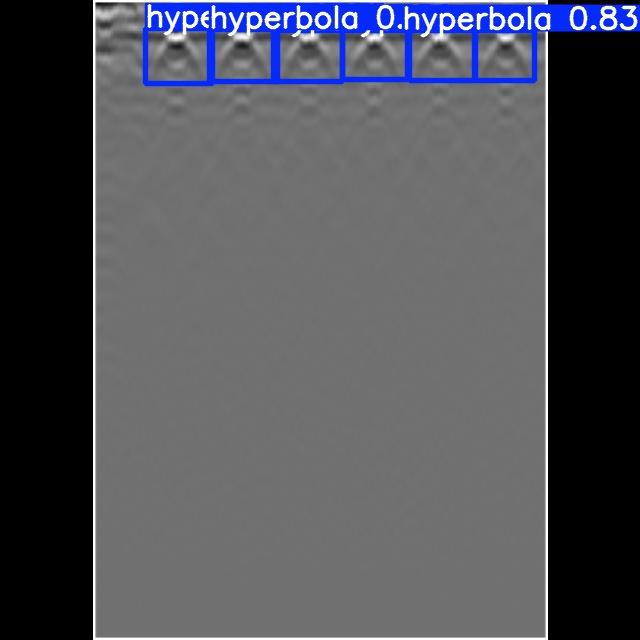

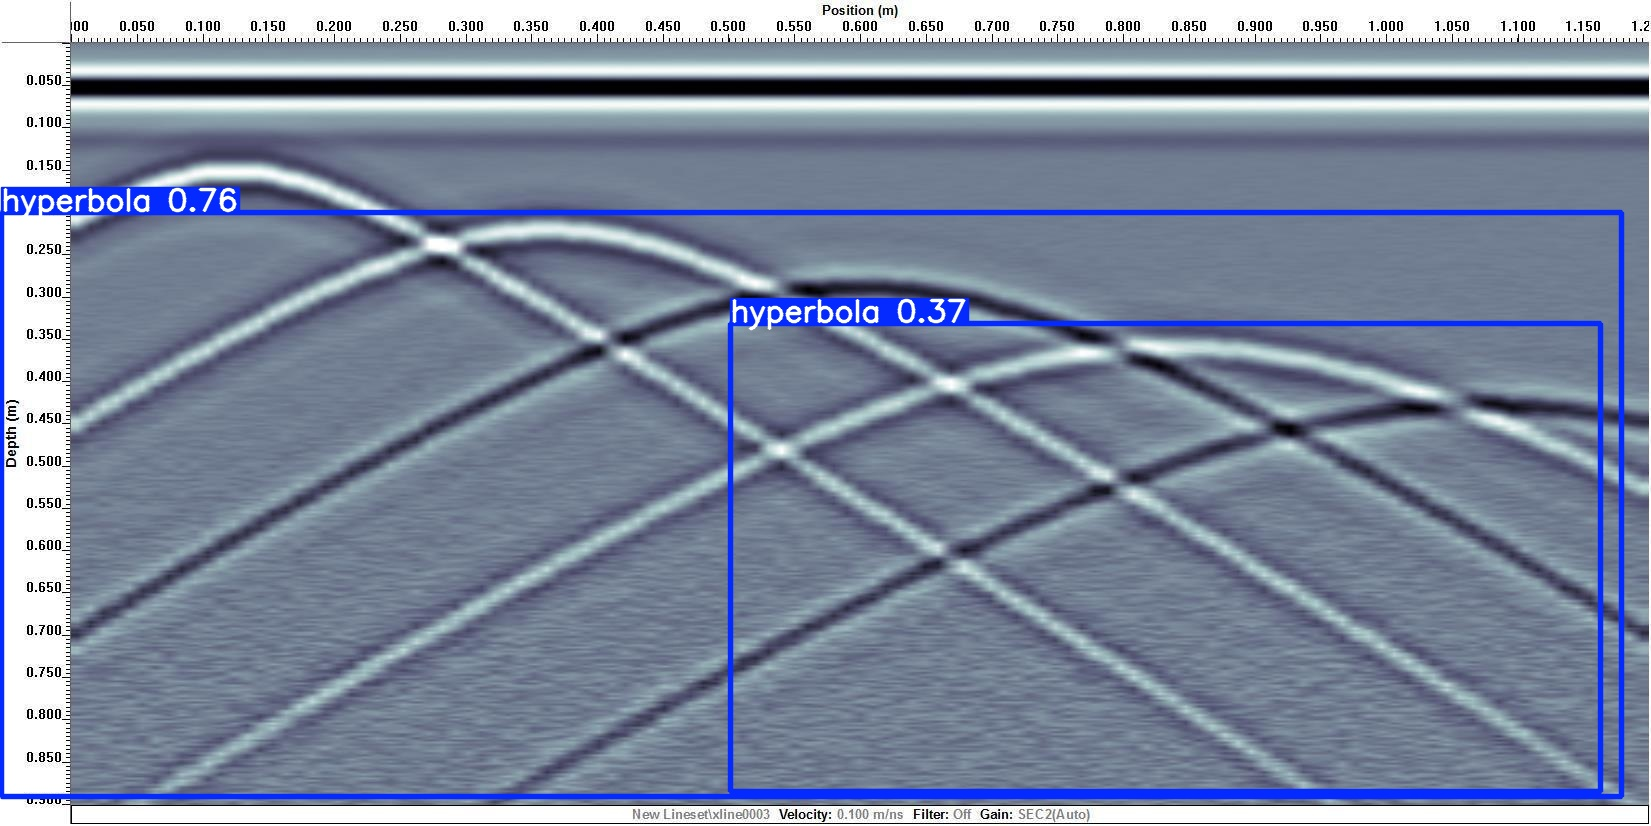

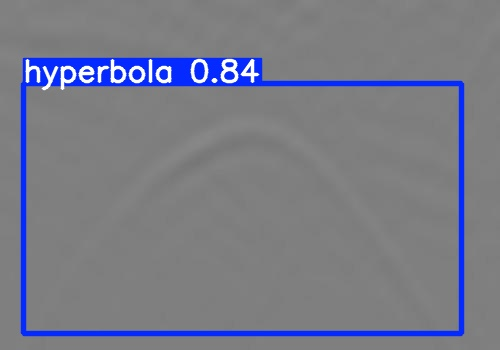

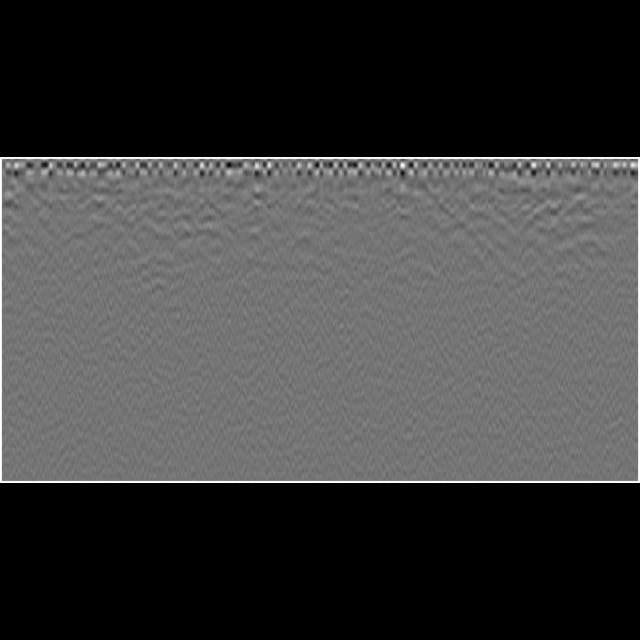

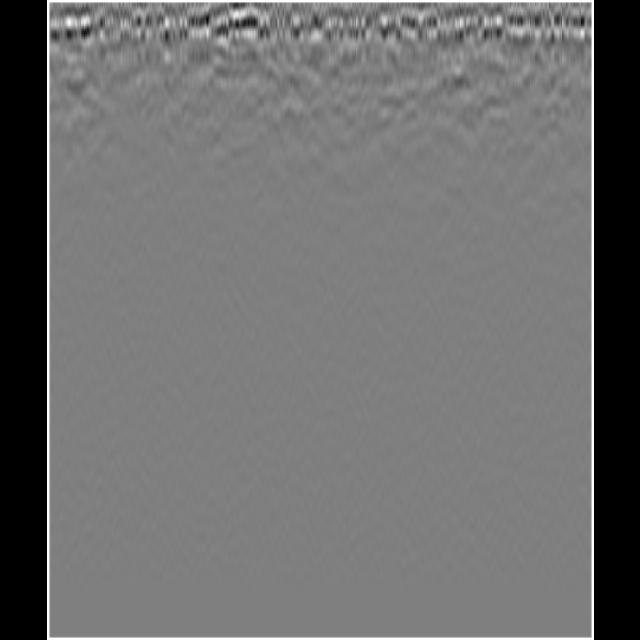

In [11]:
import glob
from IPython.display import Image, display

# Path to output folder
result_images = glob.glob('runs/detect/yolov5_infer/*.jpg')

# Display first 5 results (you can change the number)
for img_path in result_images[:5]:
    display(Image(filename=img_path))

In [ ]:
!zip -r yolov5_infer_results.zip runs/detect/yolov5_infer/
from google.colab import files
files.download('yolov5_infer_results.zip')

  adding: runs/detect/yolov5_infer/ (stored 0%)
  adding: runs/detect/yolov5_infer/808_4.png (deflated 13%)
  adding: runs/detect/yolov5_infer/998_2.png (deflated 15%)
  adding: runs/detect/yolov5_infer/892_5.png (deflated 12%)
  adding: runs/detect/yolov5_infer/938_3.png (deflated 12%)
  adding: runs/detect/yolov5_infer/1006_1.png (deflated 15%)
  adding: runs/detect/yolov5_infer/234_2.png (deflated 13%)
  adding: runs/detect/yolov5_infer/591_2.png (deflated 14%)
  adding: runs/detect/yolov5_infer/104_1.png (deflated 19%)
  adding: runs/detect/yolov5_infer/236_3.png (deflated 13%)
  adding: runs/detect/yolov5_infer/746_1.png (deflated 13%)
  adding: runs/detect/yolov5_infer/515_1.png (deflated 14%)
  adding: runs/detect/yolov5_infer/709_4.png (deflated 14%)
  adding: runs/detect/yolov5_infer/619_4.png (deflated 12%)
  adding: runs/detect/yolov5_infer/1068_3.png (deflated 15%)
  adding: runs/detect/yolov5_infer/573_0.png (deflated 12%)
  adding: runs/detect/yolov5_infer/945_3.png (defl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

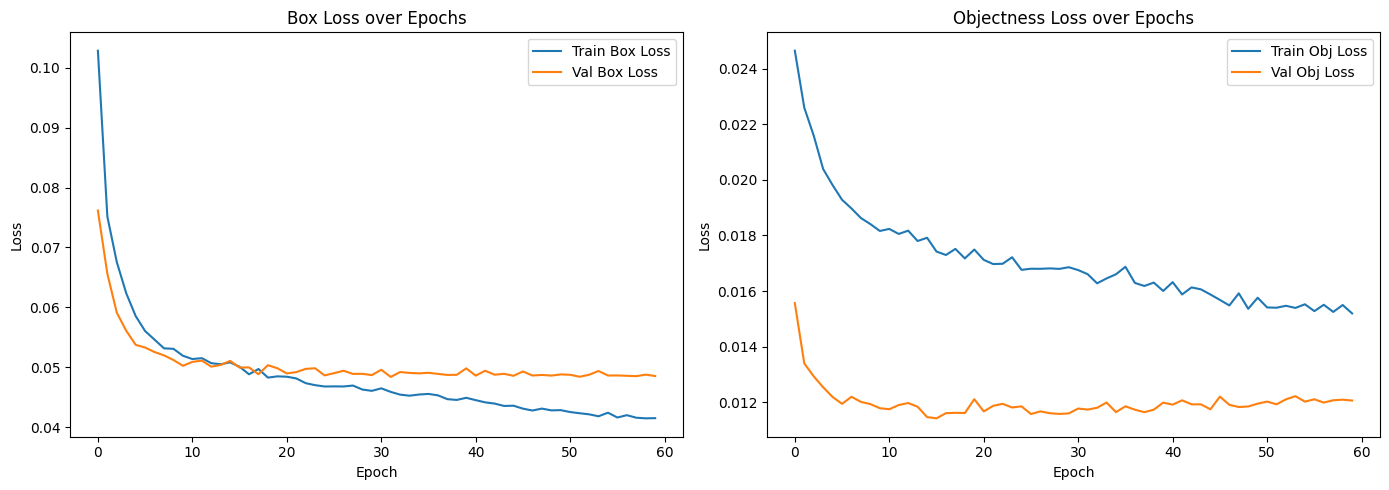

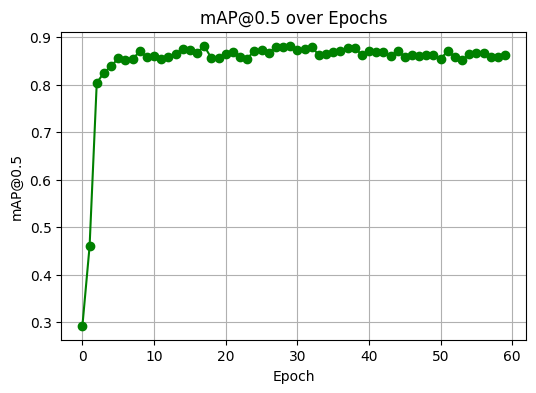

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
results_path = 'runs/train_gpr/yolov5s_gpr/results.csv'
df = pd.read_csv(results_path)

# Fix the column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Plot Box Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.title('Box Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Objectness Loss
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['train/obj_loss'], label='Train Obj Loss')
plt.plot(df['epoch'], df['val/obj_loss'], label='Val Obj Loss')
plt.title('Objectness Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot mAP
plt.figure(figsize=(6, 4))
plt.plot(df['epoch'], df['metrics/mAP_0.5'], marker='o', color='green')
plt.title('mAP@0.5 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.grid(True)
plt.show()


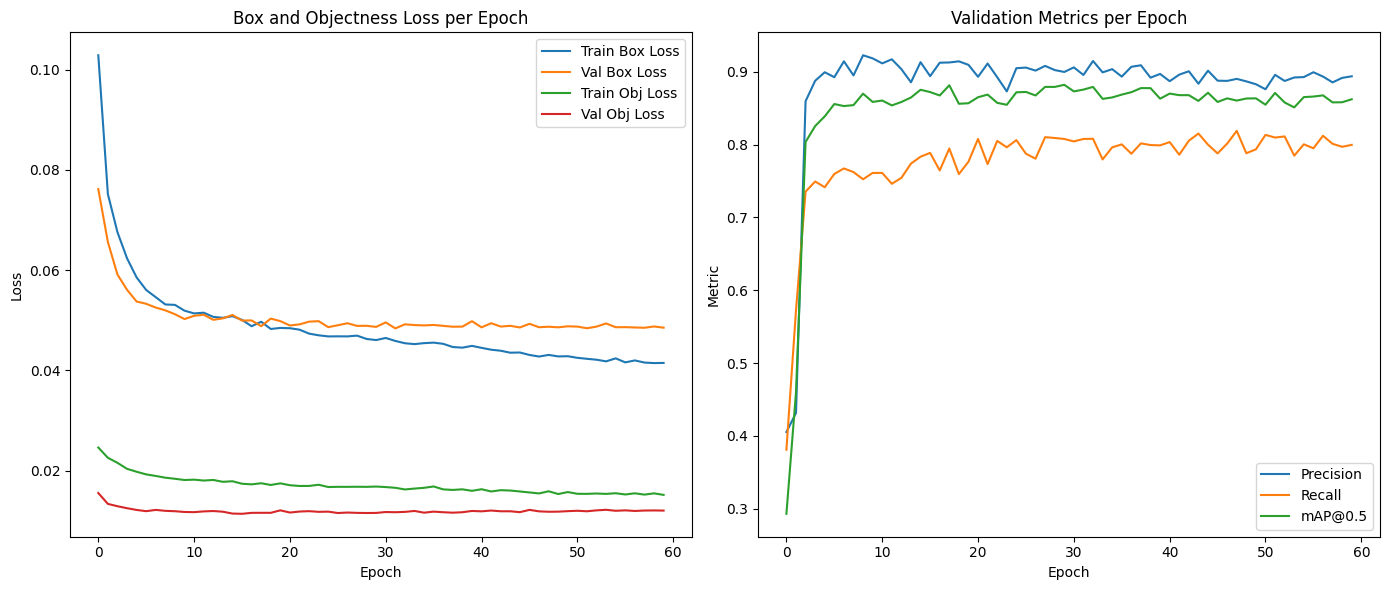

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load and clean CSV
results_path = 'runs/train_gpr/yolov5s_gpr/results.csv'
df = pd.read_csv(results_path)
df.columns = [col.strip() for col in df.columns]

# Plot Training vs Validation Losses
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['train/obj_loss'], label='Train Obj Loss')
plt.plot(df['epoch'], df['val/obj_loss'], label='Val Obj Loss')
plt.title('Box and Objectness Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Metrics: Precision, Recall, mAP
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/precision'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP_0.5'], label='mAP@0.5')
plt.title('Validation Metrics per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
last_epoch = df.iloc[-1]
print("📊 Final Epoch Stats:")
print(f"Precision: {last_epoch['metrics/precision']:.3f}")
print(f"Recall: {last_epoch['metrics/recall']:.3f}")
print(f"mAP@0.5: {last_epoch['metrics/mAP_0.5']:.3f}")
print(f"mAP@0.5:0.95: {last_epoch['metrics/mAP_0.5:0.95']:.3f}")

📊 Final Epoch Stats:
Precision: 0.894
Recall: 0.800
mAP@0.5: 0.862
mAP@0.5:0.95: 0.468


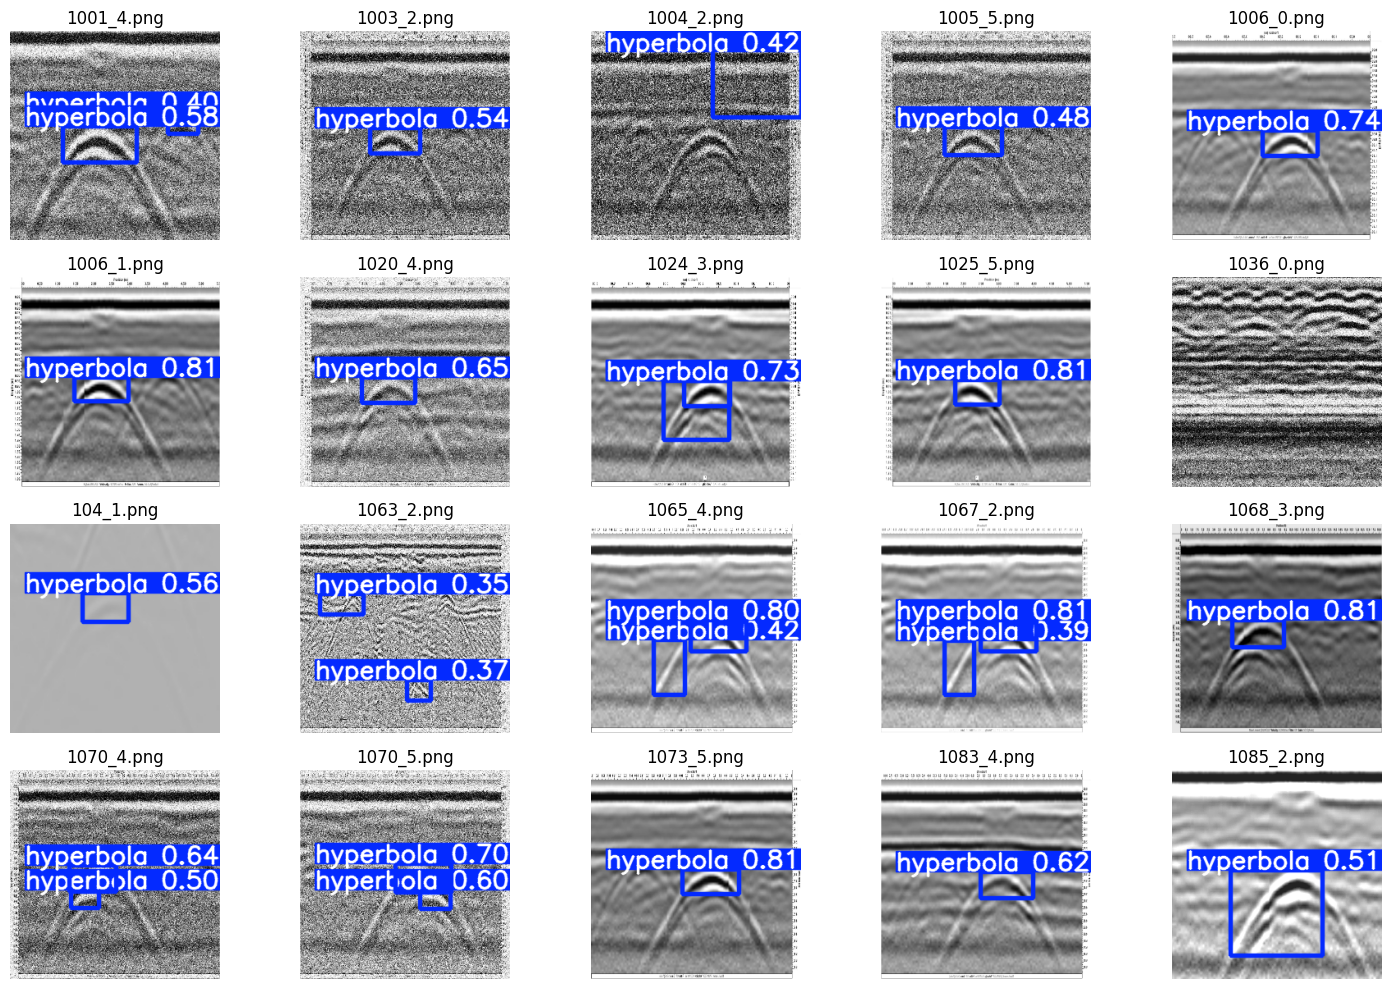

In [ ]:
y


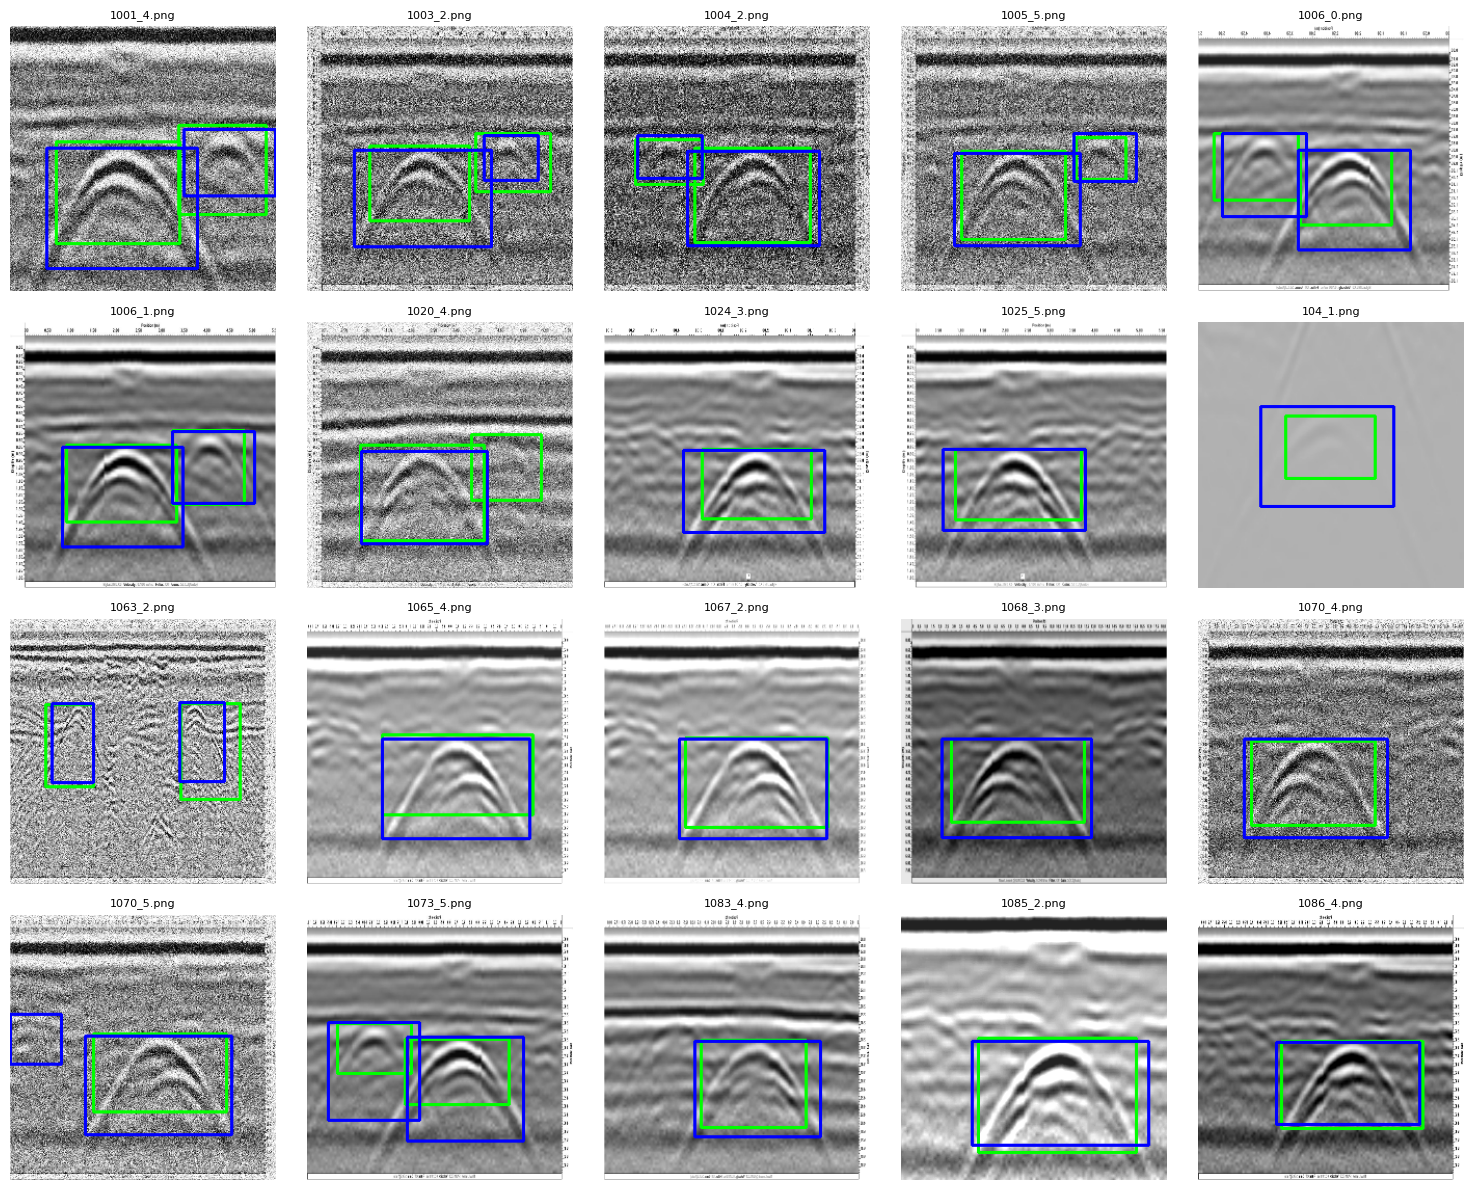

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import math

# 路径
image_dir = '/content/GPR-YOLO-Dataset/yolo_final/images/validation'
gt_label_dir = '/content/GPR-YOLO-Dataset/yolo_final/labels/validation'
pred_label_dir = 'runs/detect/yolov5_infer/labels'

# 画框函数（只返回画好框的图像）
def draw_boxes(img_path, gt_path, pred_path):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # Ground truth (green)
    if os.path.exists(gt_path):
        with open(gt_path, 'r') as f:
            for line in f:
                cls, xc, yc, bw, bh = map(float, line.strip().split())
                x1 = int((xc - bw / 2) * w)
                y1 = int((yc - bh / 2) * h)
                x2 = int((xc + bw / 2) * w)
                y2 = int((yc + bh / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Predicted (red)
    if os.path.exists(pred_path):
        with open(pred_path, 'r') as f:
            for line in f:
                cls, xc, yc, bw, bh = map(float, line.strip().split())
                x1 = int((xc - bw / 2) * w)
                y1 = int((yc - bh / 2) * h)
                x2 = int((xc + bw / 2) * w)
                y2 = int((yc + bh / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# === 显示部分 ===
images = sorted(os.listdir(image_dir))
max_show = 20   # 只显示前 20 张
images = images[:max_show]
n = len(images)

cols = 5
rows = math.ceil(n / cols)

plt.figure(figsize=(15, rows * 3))

for i, img_file in enumerate(images):
    img_path = os.path.join(image_dir, img_file)
    gt_path = os.path.join(gt_label_dir, img_file.replace('.png', '.txt'))
    pred_path = os.path.join(pred_label_dir, img_file.replace('.png', '.txt'))

    img_with_boxes = draw_boxes(img_path, gt_path, pred_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_with_boxes)
    plt.title(img_file, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
# 进到 yolov5 目录后跑
!python detect.py \
  --weights runs/train_gpr/yolov5s_gpr/weights/best.pt \
  --img 256 \
  --conf 0.30 \
  --source /content/GPR-YOLO-Dataset/yolo_final/images/test \
  --name test_infer \
  --save-txt --save-conf \
  --exist-ok

detect: weights=['runs/train_gpr/yolov5s_gpr/weights/best.pt'], source=/content/GPR-YOLO-Dataset/yolo_final/images/test, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=test_infer, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/GPR-YOLO-Dataset/yolo_final/images/test/sbp_1.png: 224x256 1 hyperbola, 50.2ms
image 2/8 /content/GPR-YOLO-Dataset/yolo_final/images/test/sbp_2.png: 128x256 (no detections), 54.7ms
image 3/8 /content/GPR-YOLO-Dataset/yolo_final/images/tes

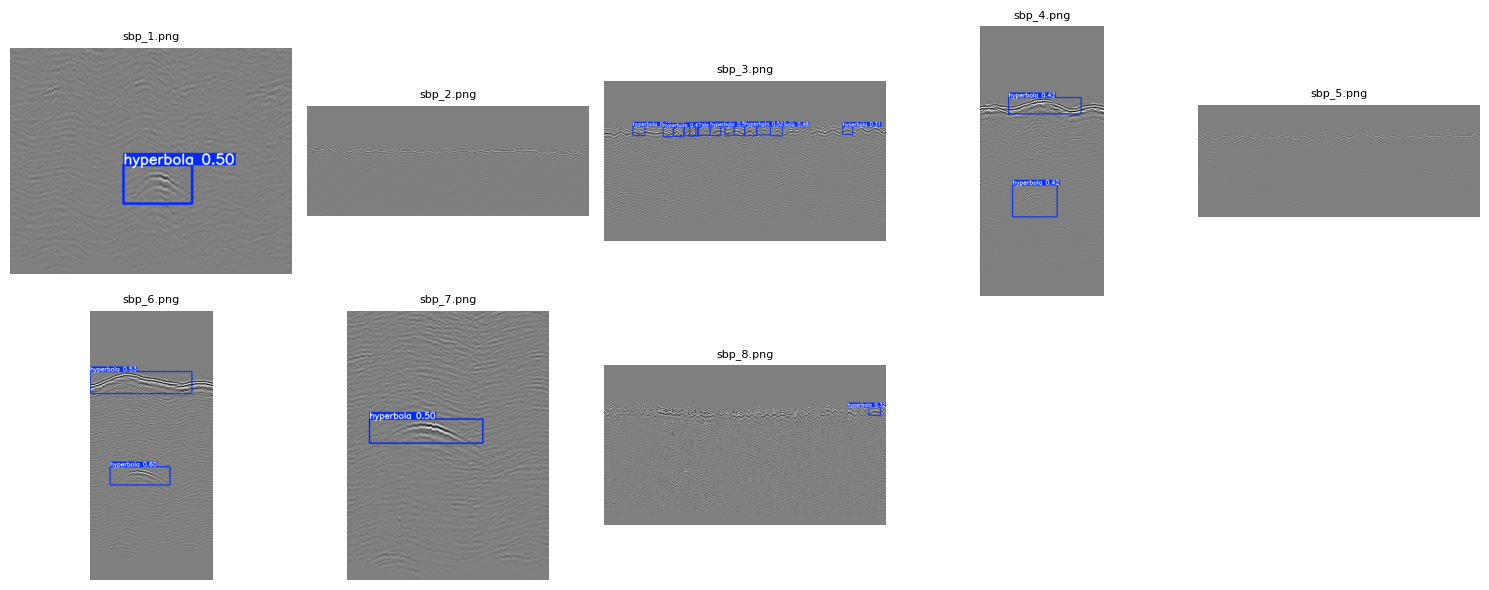

In [17]:
import os, math, cv2, matplotlib.pyplot as plt

viz_dir = "runs/detect/test_infer"
imgs = [f for f in sorted(os.listdir(viz_dir)) if f.lower().endswith(('.png','.jpg','.jpeg'))]

cols = 5
rows = math.ceil(len(imgs)/cols)
plt.figure(figsize=(3*cols, 3*rows))
for i, f in enumerate(imgs):
    img = cv2.cvtColor(cv2.imread(os.path.join(viz_dir, f)), cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, i+1)
    plt.imshow(img); plt.title(f, fontsize=8); plt.axis('off')
plt.tight_layout(); plt.show()

In [18]:
from google.colab import files
files.download('runs/train_gpr/yolov5s_gpr/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>